# Sampling from a Biased Population

> In this notebook, we will go over some code that recreates the visualizations in the Interactive Sampling Distribution Demo. This demo looks at a hypothetical problem that illustrates what happens when we sample from a biased population and not the entire population we are interested in. This tutorial assumes that you have seen that demo, for context, and understand the statistics behind the graphs. 

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Visualization]
- image: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Recreate the simulations from the video 
mean_uofm = 155
sd_uofm = 5
mean_gym = 185 
sd_gym = 5 
gymperc = .3
totalPopSize = 40000

In [3]:
# Create the two subgroups
uofm_students = np.random.normal(mean_uofm, sd_uofm, int(totalPopSize * (1 - gymperc)))
students_at_gym = np.random.normal(mean_gym, sd_gym, int(totalPopSize * (gymperc)))

In [4]:
# Combine the subgroups to form the population
population = np.append(uofm_students, students_at_gym)

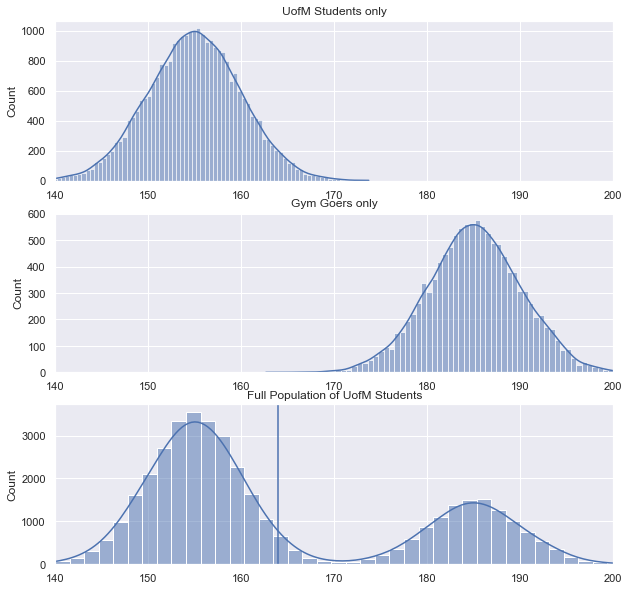

In [13]:
# Set up the figure for plotting
plt.figure(figsize=(10, 10))

# Plot the UofM students only
plt.subplot(3, 1, 1)
sns.histplot(uofm_students, kde=True)
plt.title('UofM Students only')
plt.xlim([140, 200])

# Plot the Gym Goer only
plt.subplot(3, 1, 2)
sns.histplot(students_at_gym, kde=True)
plt.title('Gym Goers only')
plt.xlim([140, 200])

# Plot both groups together
plt.subplot(3, 1, 3)
sns.histplot(population, kde=True)
plt.title('Full Population of UofM Students')
plt.axvline(x=np.mean(population))
plt.xlim([140, 200])
plt.show()

## What Happens if We Sample from the Entire Population?
We will sample randomly from all students at the University of Michigan.

In [11]:
# Simulation parameters
numberSamps = 5000
sampSize = 50

In [14]:
# Get the sampling distribution of the mean for all students
mean_distribution = np.empty(numberSamps)

for i in range(numberSamps):
    random_students = np.random.choice(population, sampSize)
    mean_distribution[i] = np.mean(random_students)

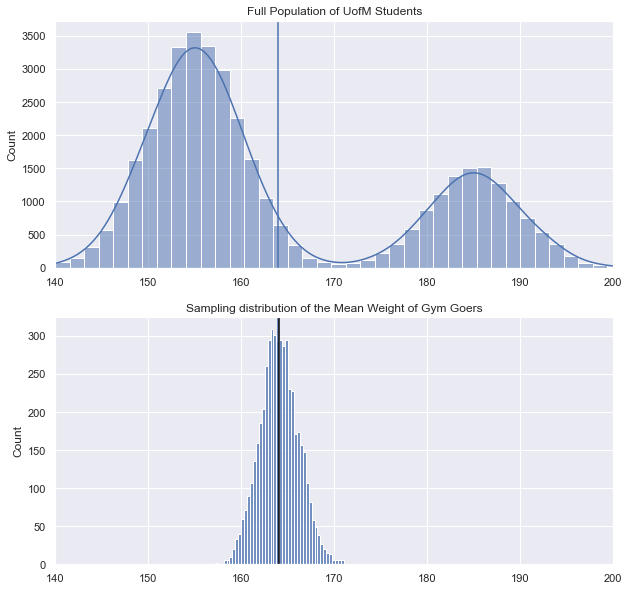

In [15]:
# Plot the population and the biased sampling distribution
plt.figure(figsize=(10, 10))

# Plotting the population again
plt.subplot(2, 1, 1)
sns.histplot(population, kde=True)
plt.title('Full Population of UofM Students')
plt.axvline(x=np.mean(population))
plt.xlim([140, 200])

# Plotting the sampling distribution of the mean
plt.subplot(2, 1, 2)
sns.histplot(mean_distribution)
plt.title('Sampling distribution of the Mean Weight of Gym Goers')
plt.axvline(x=np.mean(population))
plt.axvline(x=np.mean(mean_distribution), c='black')
plt.xlim([140, 200])

plt.show()

## What Happens if We take a Non-Representative Sample?
What happens if I only go to the gym to get the weight of individuals, and I don't sample randomly from all students at the University of Michigan?

In [16]:
# Simulation parameters
numberSamps = 5000
sampSize = 3

In [18]:
# Get the sampling distribution of the mean from only the gym goers
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution[i] = np.mean(random_students)

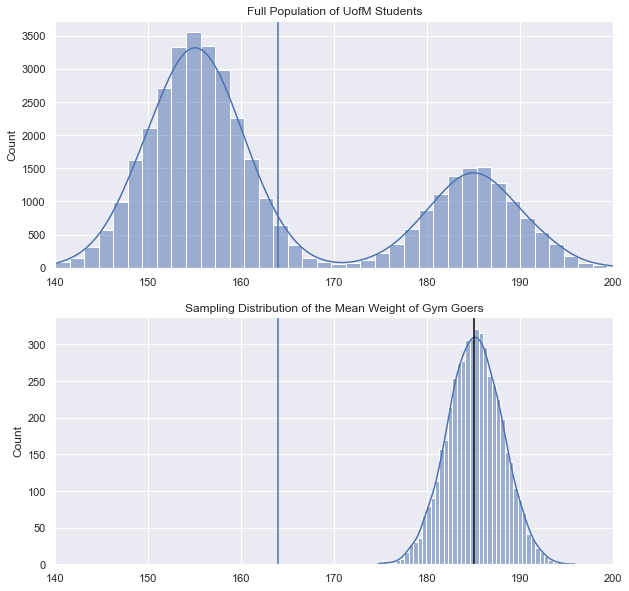

In [19]:
# Plot the population and the biased sampling distribution
plt.figure(figsize=(10, 10))

# Plotting the population again
plt.subplot(2, 1, 1)
sns.histplot(population, kde=True)
plt.title('Full Population of UofM Students')
plt.axvline(x=np.mean(population))
plt.xlim([140, 200])

# Plotting the sampling distribution
plt.subplot(2, 1, 2)
sns.histplot(mean_distribution, kde=True)
plt.title('Sampling Distribution of the Mean Weight of Gym Goers')
plt.axvline(x=np.mean(population))
plt.axvline(x=np.mean(students_at_gym), color='black')
plt.xlim([140, 200])

plt.show()